In [1]:
import numpy as np
np.float = np.float_
np.object = np.object_
np.int = np.int_
import matplotlib as m
import matplotlib.pyplot as plt
import copy as c
import pyemma
import pyemma.msm as msm
import pyemma.coordinates as coor
import pyemma.plots as mplt
import pickle as pkl

/home/jayakrishnak/softwares/anaconda/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Datas

In [2]:
dtrj = np.load('../../dtrajs_tica500_top2_kmean50.npy',allow_pickle=True)

In [3]:
cdata = np.concatenate(np.load('../../tica500.npy',allow_pickle=True))

In [4]:
clus50 = pkl.load(open('../../clustering50_tica500_top2.pkl','rb'))

In [5]:
path = '/home/jayakrishnak/hsp90/msahil/1_pbc_trajs/individual_trajs/'
traj_list = []
for i in [1,2,3,4]:
    traj_list.append(path+'bound_'+str(i)+'.xtc')
#
top = coor.featurizer('../../../../bound_open.pdb')
trj_data = coor.source(traj_list,top)

Obtaining file info:   0%|                                                                                    …

# MSM

In [5]:
model1 = msm.estimate_markov_model(list(dtrj), lag=20, )

# Population

In [6]:
pcca_states = [2,3,4,5,6]

In [7]:
for i in pcca_states:
    model1.pcca(i)
    print('pcca: ',i)
    for a,b in enumerate(model1.metastable_sets):
        print(a,'\t',model1.pi[b].sum())
    print('')

pcca:  2
0 	 0.29148710124518656
1 	 0.7085128987548135

pcca:  3
0 	 0.15660566992210206
1 	 0.2502285152478276
2 	 0.5931658148300705

pcca:  4
0 	 0.12682156514255052
1 	 0.15660566992210206
2 	 0.23224150648930486
3 	 0.48433125844604275

pcca:  5
0 	 0.13017544402640835
1 	 0.36274798422009813
2 	 0.11822939534208673
3 	 0.15660566992210206
4 	 0.23224150648930486

pcca:  6
0 	 0.050718587050620115
1 	 0.3271302399540106
2 	 0.13017544402640835
3 	 0.15660566992210206
4 	 0.10844553611579089
5 	 0.2269245229310681



# states

(<Figure size 720x504 with 2 Axes>, <AxesSubplot:>)

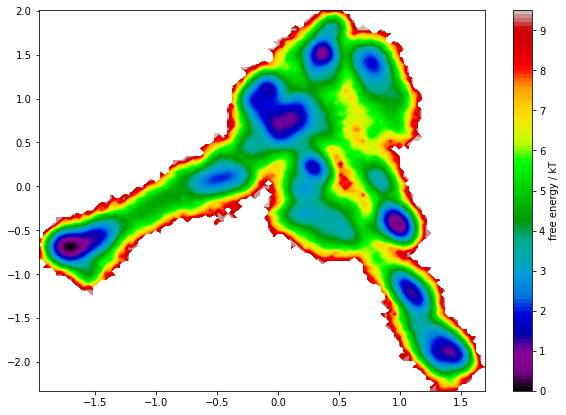

In [8]:
fig,ax = plt.subplots(1,figsize=(10,7))
mplt.plot_free_energy(cdata[:,0],cdata[:,1],weights=np.concatenate(model1.trajectory_weights()),ax=ax)

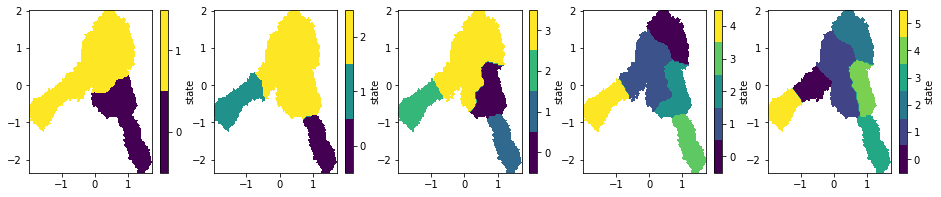

In [9]:
fig,ax=plt.subplots(1,5,figsize=(16,3))
for i in range(len(pcca_states)):
    model1.pcca(pcca_states[i])
    mplt.plot_state_map(cdata[:,0],cdata[:,1],model1.metastable_assignments[np.concatenate(model1.dtrajs_active)],ax=ax[i])

# random frame extraction

In [11]:
nframes=1000
for i in pcca_states:
    model1.pcca(i)
    pcca_distr = model1.metastable_distributions
    random_samples = model1.sample_by_distributions(pcca_distr,nframes)
    for j in range(i):
        coor.save_traj(trj_data,random_samples[j],'pcca'+str(i)+'/random/state'+str(j)+'.xtc')

26-08-22 12:09:01 pyemma.coordinates.api INFO     Created file pcca2/random/state0.xtc
26-08-22 12:09:13 pyemma.coordinates.api INFO     Created file pcca2/random/state1.xtc
26-08-22 12:09:25 pyemma.coordinates.api INFO     Created file pcca3/random/state0.xtc
26-08-22 12:09:38 pyemma.coordinates.api INFO     Created file pcca3/random/state1.xtc
26-08-22 12:09:50 pyemma.coordinates.api INFO     Created file pcca3/random/state2.xtc
26-08-22 12:10:03 pyemma.coordinates.api INFO     Created file pcca4/random/state0.xtc
26-08-22 12:10:14 pyemma.coordinates.api INFO     Created file pcca4/random/state1.xtc
26-08-22 12:10:25 pyemma.coordinates.api INFO     Created file pcca4/random/state2.xtc
26-08-22 12:10:37 pyemma.coordinates.api INFO     Created file pcca4/random/state3.xtc
26-08-22 12:10:49 pyemma.coordinates.api INFO     Created file pcca5/random/state0.xtc
26-08-22 12:11:03 pyemma.coordinates.api INFO     Created file pcca5/random/state1.xtc
26-08-22 12:11:15 pyemma.coordinates.api IN

# microstates in macrostates

In [12]:
micro_pop = { i[0]:i[1] for i in np.loadtxt('../../micro_pop_tica500_clus50_top2.txt',dtype='int')}
for i in pcca_states:
    model1.pcca(i)
    print('\n\n pcca: ',i)
    n=-1
    for j in model1.metastable_sets:
        n+=1
        kk = {k:micro_pop[k] for k in j}
        sk = np.array(sorted(kk.items(), reverse=True, key=lambda kv:(kv[1],kv[0])))
        ss = np.sum(sk[:,1])
        plist = [[k[0],np.round(k[1]/ss,3)] for k in sk]
        print(plist)
        print('')
        np.savetxt('pcca'+str(i)+'/micro_pop/state'+str(n)+'.txt',plist,fmt='%d'+'%12.3f')



 pcca:  2
[[22, 0.066], [9, 0.063], [29, 0.058], [44, 0.052], [37, 0.045], [18, 0.043], [48, 0.042], [5, 0.041], [1, 0.039], [8, 0.039], [3, 0.036], [28, 0.035], [46, 0.034], [32, 0.033], [41, 0.031], [13, 0.029], [40, 0.029], [25, 0.029], [36, 0.028], [15, 0.027], [23, 0.026], [42, 0.023], [24, 0.02], [31, 0.02], [6, 0.018], [35, 0.017], [16, 0.015], [12, 0.013], [19, 0.012], [49, 0.011], [17, 0.01], [33, 0.008], [11, 0.008]]

[[4, 0.157], [27, 0.139], [38, 0.088], [2, 0.079], [7, 0.073], [30, 0.06], [43, 0.059], [21, 0.056], [34, 0.054], [0, 0.049], [47, 0.038], [10, 0.034], [20, 0.03], [26, 0.027], [45, 0.025], [39, 0.023], [14, 0.009]]



 pcca:  3
[[4, 0.09], [27, 0.08], [29, 0.068], [18, 0.051], [48, 0.049], [5, 0.048], [8, 0.045], [3, 0.042], [28, 0.041], [46, 0.04], [41, 0.036], [13, 0.034], [43, 0.034], [40, 0.034], [25, 0.034], [36, 0.032], [23, 0.031], [0, 0.028], [24, 0.023], [31, 0.023], [47, 0.022], [10, 0.02], [16, 0.017], [12, 0.015], [26, 0.015], [19, 0.014], [39, 0.

## final model - pcca4

In [5]:
model1 = msm.estimate_markov_model(list(dtrj), lag=20)

In [6]:
model1.pcca(4)

PCCA(P=array([[5.26287e-01, 0.00000e+00, ..., 1.98778e-03, 1.52115e-03],
       [0.00000e+00, 3.97521e-01, ..., 0.00000e+00, 0.00000e+00],
       ...,
       [1.17691e-03, 0.00000e+00, ..., 3.84125e-01, 2.93967e-04],
       [3.23795e-03, 0.00000e+00, ..., 1.05687e-03, 6.91482e-01]]),
   m=4)

In [13]:
for a,b in enumerate(model1.metastable_sets):
    print(a,model1.pi[b].sum())

0 0.12682156514255052
1 0.15660566992210206
2 0.23224150648930486
3 0.48433125844604275


In [16]:
mfpt = np.zeros((4,4))
for i in range(4):
    for j in range(4):
        mfpt[i,j] = model1.mfpt(model1.metastable_sets[i],model1.metastable_sets[j])*20*10*10**(-6)

In [17]:
mfpt

array([[ 0.        , 21.42064643, 13.49932822,  1.36066005],
       [ 4.25268196,  0.        , 17.52597877,  5.2446001 ],
       [ 9.14097843, 32.10661507,  0.        ,  2.86695499],
       [ 3.57775641, 26.56874829, 10.49368851,  0.        ]])

In [47]:
metastable_trj = model1.metastable_assignments[np.concatenate(model1.dtrajs_active)]

In [10]:
k=0
dtrj_final = c.deepcopy(dtrj)
for i in range(np.shape(dtrj)[0]):
    for j in range(np.shape(dtrj[i])[0]):
        dtrj_final[i][j] = metastable_trj[k] + 0
        k += 1

In [11]:
metastable_model = msm.estimate_markov_model(dtrj_final,1000)

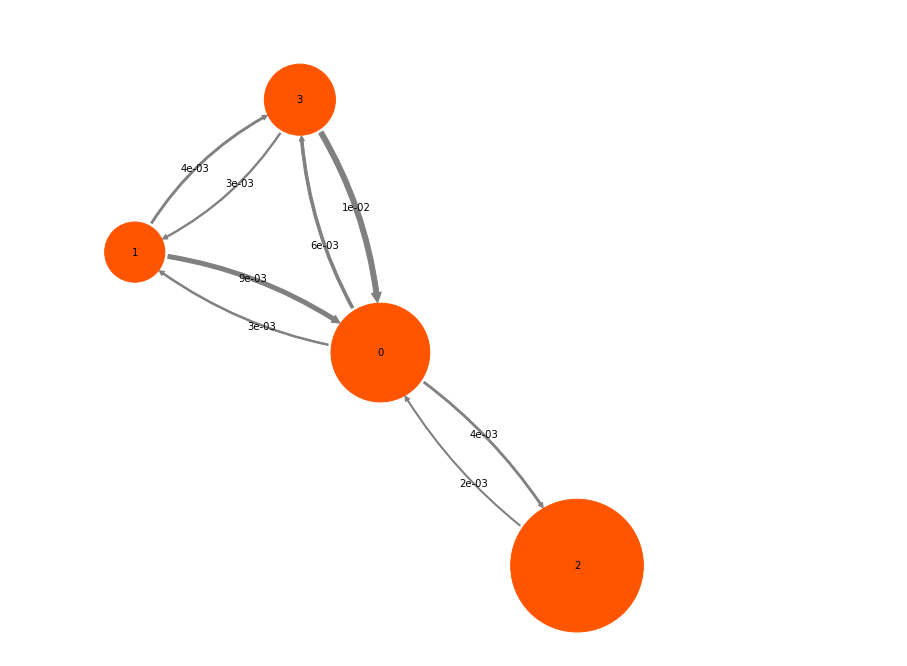

In [14]:
fig,ax = plt.subplots(1,figsize=(16,12))
mplt.plot_markov_model(metastable_model,ax=ax,
                       #pos=pos,
                       #arrow_labels=None, arrow_scale=1.6,
                       #state_labels=labels,
                       #state_colors='lightblue', state_scale=2, show_frame=True
                      )
plt.show()

In [33]:
len(np.where(dd == 3)[0])/len(dd)

0.1735526911182722

In [49]:
len(np.where(metastable_trj == 0)[0])/len(metastable_trj)

0.4512607468481329

# plotting

In [7]:
model20 = msm.estimate_markov_model(list(dtrj), lag=20)

In [6]:
kt= 0.617

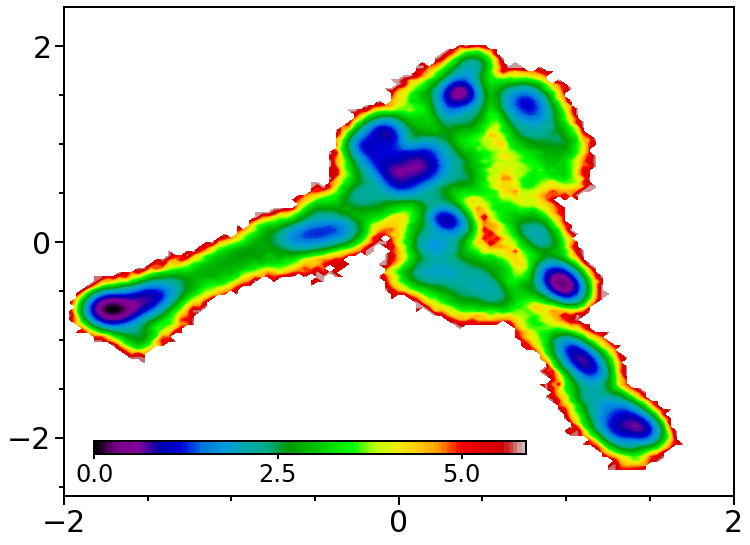

In [9]:
fig, ax = plt.subplots(1, figsize=(12,9))
cax = fig.add_axes([0.16,0.19,0.5,0.02])
mplt.plot_free_energy(cdata[:,0], cdata[:,1], weights=np.concatenate(model20.trajectory_weights()),
                      ax=ax, cax=cax, kT=kt, cbar_label=None, cbar_orientation='horizontal')
ax.set_xlim(-2,2)
ax.set_ylim(-2.6,2.4)
ax.tick_params(labelsize=30, length=9, width=2)
cax.tick_params(labelsize=24, length=5, width=2)
ax.spines[:].set_linewidth(2)
cax.spines[:].set_linewidth(2)
cax.set_xticks([0,2.5,5])
ax.set_xticks([-2,0,2])
ax.set_yticks([-2,0,2])
ax.xaxis.set_minor_locator(m.ticker.AutoMinorLocator(4))
ax.yaxis.set_minor_locator(m.ticker.AutoMinorLocator(4))
ax.tick_params(which='minor', length=5, width=2)

plt.savefig('weighted_energy.pdf')
plt.show()

In [8]:
model20.pcca(4)

PCCA(P=array([[5.26287e-01, 0.00000e+00, ..., 1.98778e-03, 1.52115e-03],
       [0.00000e+00, 3.97521e-01, ..., 0.00000e+00, 0.00000e+00],
       ...,
       [1.17691e-03, 0.00000e+00, ..., 3.84125e-01, 2.93967e-04],
       [3.23795e-03, 0.00000e+00, ..., 1.05687e-03, 6.91482e-01]]),
   m=4)

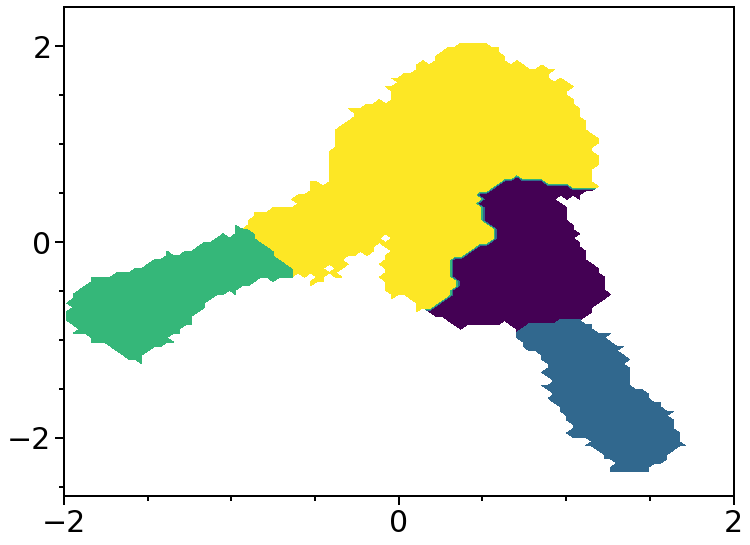

In [11]:
fig, ax = plt.subplots(1, figsize=(12,9))
mplt.plot_state_map( cdata[:,0], cdata[:,1],
                    model20.metastable_assignments[np.concatenate((model20.dtrajs_active))],
                   ax=ax, cbar=False)
ax.set_xlim(-2,2)
ax.set_ylim(-2.6,2.4)
ax.tick_params(labelsize=30, length=9, width=2)
ax.spines[:].set_linewidth(2)
ax.set_xticks([-2,0,2])
ax.set_yticks([-2,0,2])
ax.xaxis.set_minor_locator(m.ticker.AutoMinorLocator(4))
ax.yaxis.set_minor_locator(m.ticker.AutoMinorLocator(4))
ax.tick_params(which='minor', length=5, width=2)
#
plt.savefig('state_map.pdf')
plt.show()

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:>,
 {'mappable': <matplotlib.contour.QuadContourSet at 0x7f6656710bb0>,
  'cbar': <matplotlib.colorbar.Colorbar at 0x7f6656752c70>})

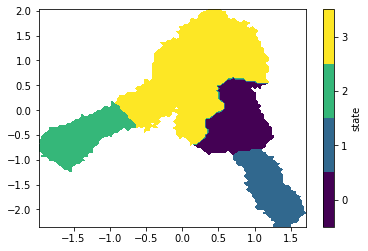

In [41]:
mplt.plot_state_map( cdata[:,0], cdata[:,1],
                    model20.metastable_assignments[np.concatenate((model20.dtrajs_active))])


In [9]:
niter=10
npcca=4
populations = np.zeros((niter, npcca))
committors = np.zeros((niter, npcca))
mfpts = np.zeros((niter,npcca,npcca))
pathways=[]
fpathways=[]
diffs = np.zeros((niter))
mini=0.01
maxi=0.1
sind=2
eind=3

for i in range(niter):
    rant = np.random.randint(dtrj.shape[0])
    rans = mini + np.random.random()*(maxi-mini)
    rans = int(np.floor(dtrj[rant].shape[0] * rans))
    rand = [-1,1][np.random.randint(0,2)]
    ndata = c.deepcopy(list(dtrj))
    if rand==1:
        ndata[rant] = ndata[rant][:-rans]
    else:
        ndata[rant] = ndata[rant][rans:]
    #
    nmodel = msm.estimate_markov_model(list(ndata), lag=20)
    nmodel.pcca(npcca)
    #
    dmt=np.zeros((npcca, npcca))
    psets = []
    diff=0
    for j in range(npcca):
        for k in range(npcca):
            dmt[j][k] = np.setdiff1d(model20.metastable_sets[j], nmodel.metastable_sets[k]).shape[0]
        psets.append(nmodel.metastable_sets[np.argmin(dmt[j])])
        diff += np.min(dmt[j])
    diffs[i] = diff
    #
    for k in range(npcca):
        populations[i][k] = nmodel.pi[psets[k]].sum()
        for j in range(npcca):
            mfpts[i][k][j] = nmodel.mfpt(psets[k], psets[j]) * 20 * 10 * 10**(-6)
    #
    tpt = msm.tpt(nmodel, psets[sind], psets[eind])
    cg, cgflux = tpt.coarse_grain(nmodel.metastable_sets)
    committors[i] = cgflux.committor
    paths, pathfluxes = cgflux.pathways(fraction=0.99)
    pathfluxes = pathfluxes/np.sum(pathfluxes)
    pathways.append(paths)
    fpathways.append(pathfluxes)

In [11]:
np.save('mfpts.npy', mfpts)
np.save('pops.npy', populations)

In [9]:
dd = model20.metastable_assignments[np.concatenate((model20.dtrajs_active))]
metastable_dtrj = []
k=0
for i in range(len(dtrj)):
    di=[]
    for j in range(len(dtrj[i])):
        di.append(dd[k])
        k += 1
    metastable_dtrj.append(di)

In [10]:
metastable_model = msm.estimate_markov_model(metastable_dtrj, lag=20)

In [23]:
positions = np.array([
    [1,-1],
    [1,-2],
    [-1,-0.5],
    [0,0]
])
names = np.array(['I1', 'I2', 'S', 'O1'])

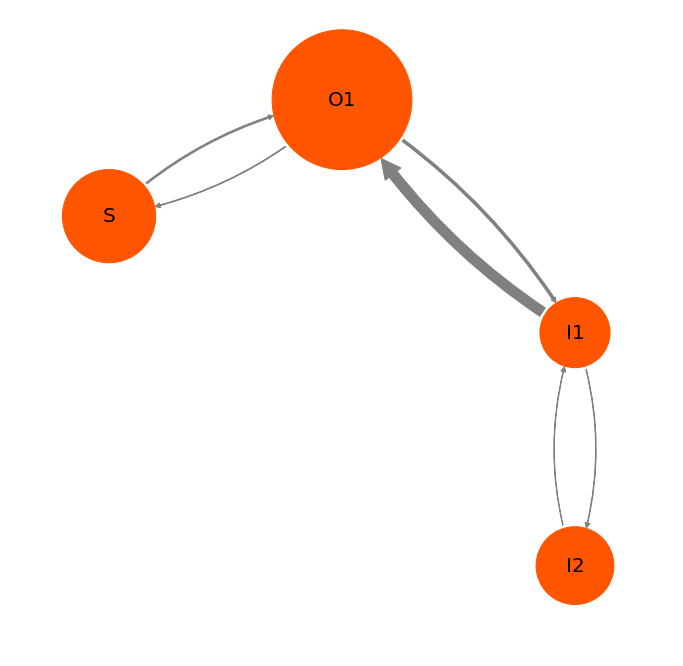

In [32]:
fig,ax = plt.subplots(1,figsize=(12,12))
mplt.plot_markov_model(metastable_model, pos=positions, state_labels=names, size=20, 
                       arrow_labels=None, arrow_scale=2, ax=ax)
plt.savefig('network.pdf')
plt.show()

In [14]:
mfpts = np.load('mfpts.npy')
populations = np.load('pops.npy')

In [15]:
np.mean(mfpts, axis=0).round(2)

array([[ 0.  , 21.2 , 13.43,  1.38],
       [ 4.25,  0.  , 17.46,  5.27],
       [ 9.36, 32.1 ,  0.  ,  3.29],
       [ 3.48, 26.24, 10.53,  0.  ]])

In [16]:
np.std(mfpts, axis=0).round(2)

array([[0.  , 0.18, 1.62, 0.05],
       [0.  , 0.  , 1.62, 0.09],
       [0.5 , 0.6 , 0.  , 0.78],
       [0.11, 0.28, 1.5 , 0.  ]])

In [18]:
np.mean(populations*100, axis=0).round(2)

array([12.91, 15.81, 23.9 , 47.38])

In [19]:
np.std(populations*100, axis=0).round(2)

array([0.39, 0.12, 1.47, 1.57])